# Modelling

## Notebook Summary

Implementations:
- Decision Tree Regressor
- Random Forest Regressor

## Notebook Setup

In [11]:
# Standard imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Loading sklearn functionality
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set global random seed for reproducibility
random_seed_val = 42
np.random.seed(random_seed_val)

## Data loading

In [2]:
# Creating DataFrame
pp_house_df = pd.read_csv("london_house_price_data_pp.csv")
# Viewing DataFrame
pp_house_df.head(5)

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Freehold,tenure_Leasehold,...,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,2.0,71.0,1.0,759000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,1.0,64.0,1.0,388000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,4.0,137.0,2.0,1261000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,51.466089,0.006967,1.0,2.0,97.0,1.0,944000.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,51.451327,-0.007569,1.0,3.0,135.0,2.0,726000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [3]:
# Columns and data types
pp_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             265911 non-null  float64
 1   longitude                            265911 non-null  float64
 2   bathrooms                            265911 non-null  float64
 3   bedrooms                             265911 non-null  float64
 4   floorAreaSqM                         265911 non-null  float64
 5   livingRooms                          265911 non-null  float64
 6   saleEstimate_currentPrice            265911 non-null  float64
 7   tenure_Feudal                        265911 non-null  float64
 8   tenure_Freehold                      265911 non-null  float64
 9   tenure_Leasehold                     265911 non-null  float64
 10  tenure_Shared                        265911 non-null  float64
 11  propertyType_

Checking that all the data types are numerical

In [10]:
# Shape of the DataFrame
pp_house_df.shape

(265911, 31)

## Preparing Data

In [4]:
# Seperating features from target
X = pp_house_df.drop('saleEstimate_currentPrice', axis=1)
y = pp_house_df['saleEstimate_currentPrice']

In [5]:
# Remainder test split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed_val)

# Train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.20, random_state=random_seed_val)

# Checking size of split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}") 
print(f"Test set size: {len(X_test)}")

Training set size: 170182
Validation set size: 42546
Test set size: 53183


## Non-Linear Modelling

### Decision Tree Regressor

#### Regression tree 1
- max depth = 2
- purpose = visualisation & understanding

In [ ]:
# Decision tree of max depth of 2

# Instantiate and fit model
dt_md2 = DecisionTreeRegressor(max_depth = 2)
dt_md2_fit = dt_md2.fit(X_train, y_train)

# Prediction score 
dt_md2_predict = dt_md2_fit.predict(X_train)

# TRAIN DATA EVAL:

# Calculate R-squared 
r2_train = r2_score(y_train, dt_md2_predict)
print(f"R-squared:{r2_train}")

# Calculate MAE
mae_train = mean_absolute_error(y_true=y_train, y_pred=dt_md2_predict)
print(f"MAE:{mae_train}")

# Calculate RMSE
mse_train = mean_squared_error(y_true=y_train, y_pred=dt_md2_predict)
rmse_train = math.sqrt(mse_train)
print(f"RMSE:{rmse_train}")

R-squared:0.5505827115309558
MAE:306094.86490228144
RMSE:535473.8096561081


In [ ]:
# VALIDATION DATA EVAL:

# Prediction score 
dt_md2_predict = dt_md2_fit.predict(X_valid)

# Calculate R-squared for evaluation
r2_valid = r2_score(y_valid, dt_md2_predict)
print(f"R-squared:{r2_valid}")

# Calculate MAE
mae_valid = mean_absolute_error(y_true=y_valid, y_pred=dt_md2_predict)
print(f"MAE:{mae_valid}")

# Calculate RMSE
mse = mean_squared_error(y_true=y_valid, y_pred=dt_md2_predict)
rmse = math.sqrt(mse)
print(f"RMSE:{rmse}")

R-squared:0.5408864945022713
MAE:307093.2295983481
RMSE:553877.3491583251


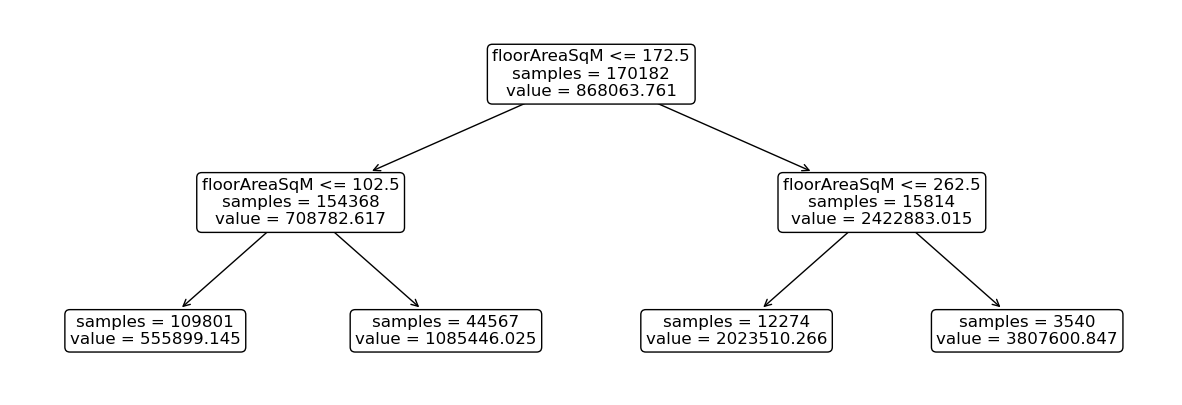

In [ ]:
# Visualise inital DTR
fig, ax = plt.subplots(figsize=(15, 5))

plot_tree(
    dt_md2_fit,
    feature_names=X_train.columns.to_list(),
    rounded=True,
    impurity=False,
    filled=False, 
    ax=ax,
    fontsize=12,
)
plt.show()

In [ ]:
# Tuning Max depth for DTR

depths_list = list(range(1, int(np.sqrt(len(X_train)))))
r2_values = []
mse_values = []

for depth in depths_list:
    decision_tree_model = DecisionTreeRegressor(max_depth=depth)
    decision_tree_model.fit(X_train, y_train)

    # Evaluate
    r2_values.append(decision_tree_model.r2_score(X_train, y_train))


In [ ]:
# Prune Max Depth for DTR with loop
# Plot RMSE against max depth
# Plot MAE against max depth
# Plot R^2 against max depth
# Choose which is the best max depth for the tree and why

In [ ]:
# Make a comment on how well the decision tree performs and why it is required